In [1]:
import pandas as pd 
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1000)

In [3]:
df1 = pd.read_csv('facilities_error_rates_data.csv', encoding='utf8')
df2 = pd.read_csv('radiology_practice_data.csv', encoding='utf8')


df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 933 entries, Facility_0264_A to Facility_0021_C
dtypes: float64(933)
memory usage: 7.1 MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 5 columns):
parent_id                311 non-null int64
facility_id              311 non-null object
anatomy_a_exam_volume    311 non-null int64
anatomy_b_exam_volume    311 non-null int64
anatomy_c_exam_volume    311 non-null int64
dtypes: int64(4), object(1)
memory usage: 12.2+ KB


# PART 1

### Estimating a weighted average error rate for Population across various exam types

In [5]:
# Transposing the data frame and reseting index

df3=df1.T.reset_index()

In [6]:
df3['exam']=df3['index'].map(lambda y: y.split('_')[2])
df3['facility_id']=df3['index'].map(lambda y: y.split('_')[:2])
df3['facility_id']=df3['facility_id'].apply(lambda y: str(y[0])+'_'+str(y[1]))
    

In [7]:
df_A=df3[df3['exam']=='A'].copy()
new_cols=[str(i)+'_'+'A'for i in df_A.columns]
df_A.rename(columns=dict(zip(df_A.columns[:-1], new_cols)),inplace=True)

In [8]:
data_A=pd.merge(df_A, df2.iloc[:,1:3], on=['facility_id'])


In [9]:
s_A=data_A.iloc[:,1:1001].multiply(data_A['anatomy_a_exam_volume'],axis="index")


In [10]:
df_B=df3[df3['exam']=='B'].copy()
new_cols=[str(i)+'_'+'B'for i in df_B.columns]
df_B.rename(columns=dict(zip(df_B.columns[:-1], new_cols)),inplace=True)

In [11]:
data_B=pd.merge(df_B, df2.iloc[:,1:4], on=['facility_id'])


In [12]:
s_B=data_B.iloc[:,1:1001].multiply(data_B['anatomy_b_exam_volume'],axis="index")

In [13]:
df_C=df3[df3['exam']=='C'].copy()
new_cols=[str(i)+'_'+'C'for i in df_C.columns]
df_C.rename(columns=dict(zip(df_C.columns[:-1], new_cols)),inplace=True)

In [14]:
data_C=pd.merge(df_C, df2.iloc[:,1:5], on=['facility_id'])


In [15]:
s_C=data_C.iloc[:,1:1001].multiply(data_C['anatomy_c_exam_volume'],axis="index")

In [16]:
df_all=pd.DataFrame(s_A.as_matrix()+s_B.as_matrix()+s_C.as_matrix())

In [17]:
df_all=pd.concat([data_A['facility_id'],df_all], axis=1)

In [18]:
data_all=pd.merge(df2, df_all, on=['facility_id'])



In [19]:
data_all['exam_volume_sum']=data_all['anatomy_a_exam_volume'] +data_all['anatomy_b_exam_volume']+data_all['anatomy_c_exam_volume']

In [20]:
data_all_1=data_all.iloc[:,5:-1].divide(data_all['exam_volume_sum'],axis="index")



In [21]:
data_final=pd.concat([data_A['facility_id'],data_all_1], axis=1)

In [22]:
data_final.head()

,facility_id,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,Facility_0264,0.031783,0.028786,0.036388,0.027582,0.027896,0.025476,0.032638,0.031408,0.029912,...,0.031124,0.029281,0.032823,0.029763,0.025632,0.022270,0.029164,0.029986,0.030704,0.037376
1,Facility_0301,0.269745,0.234471,0.229956,0.207903,0.262946,0.262699,0.239258,0.278468,0.253754,...,0.246143,0.232332,0.273544,0.269466,0.247630,0.259992,0.282825,0.314680,0.235005,0.255889
2,Facility_0310,0.142657,0.151259,0.142772,0.136024,0.134451,0.154550,0.139490,0.141200,0.147731,...,0.145342,0.123114,0.140860,0.138390,0.144968,0.140664,0.144690,0.131341,0.142198,0.136873
3,Facility_0156,0.066078,0.116969,0.035753,0.061968,0.076893,0.045461,0.095132,0.161350,0.092989,...,0.040615,0.050714,0.143067,0.044882,0.053509,0.135221,0.151103,0.080826,0.040965,0.077580
4,Facility_0009,0.386058,0.363962,0.454798,0.360838,0.387461,0.385500,0.343959,0.413509,0.406072,...,0.339221,0.352862,0.379755,0.373487,0.402840,0.400167,0.402509,0.360588,0.362250,0.379045


### Estimating a weighted average error rate for Provider 0 across various exam types

In [23]:
data_parent_id=pd.merge(data_all[['parent_id','facility_id']], data_final, on=['facility_id'])

In [24]:
data_provider0=data_parent_id[data_parent_id['parent_id']==0]

data_provider0

,parent_id,facility_id,0,1,2,3,4,5,6,7,...,990,991,992,993,994,995,996,997,998,999
2,0,Facility_0310,0.142657,0.151259,0.142772,0.136024,0.134451,0.154550,0.139490,0.141200,...,0.145342,0.123114,0.140860,0.138390,0.144968,0.140664,0.144690,0.131341,0.142198,0.136873
52,0,Facility_0311,0.093934,0.091443,0.106611,0.094951,0.101161,0.106449,0.095327,0.102173,...,0.109018,0.112999,0.104802,0.107331,0.103767,0.116001,0.106820,0.111043,0.096411,0.117253
113,0,Facility_0308,0.123717,0.117951,0.107032,0.115629,0.120879,0.128233,0.122325,0.119523,...,0.126801,0.122948,0.113776,0.137274,0.113226,0.112904,0.109100,0.123032,0.104678,0.107263
254,0,Facility_0309,0.185924,0.188510,0.186599,0.195713,0.189753,0.207276,0.209604,0.196825,...,0.193656,0.194640,0.208923,0.203466,0.207139,0.190658,0.184622,0.202120,0.204900,0.205666


In [25]:
data_provider0=data_provider0.iloc[:,1:].reset_index(drop=True)

data_provider0

,facility_id,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,Facility_0310,0.142657,0.151259,0.142772,0.136024,0.134451,0.154550,0.139490,0.141200,0.147731,...,0.145342,0.123114,0.140860,0.138390,0.144968,0.140664,0.144690,0.131341,0.142198,0.136873
1,Facility_0311,0.093934,0.091443,0.106611,0.094951,0.101161,0.106449,0.095327,0.102173,0.125421,...,0.109018,0.112999,0.104802,0.107331,0.103767,0.116001,0.106820,0.111043,0.096411,0.117253
2,Facility_0308,0.123717,0.117951,0.107032,0.115629,0.120879,0.128233,0.122325,0.119523,0.113774,...,0.126801,0.122948,0.113776,0.137274,0.113226,0.112904,0.109100,0.123032,0.104678,0.107263
3,Facility_0309,0.185924,0.188510,0.186599,0.195713,0.189753,0.207276,0.209604,0.196825,0.202640,...,0.193656,0.194640,0.208923,0.203466,0.207139,0.190658,0.184622,0.202120,0.204900,0.205666


In [26]:
df_provider0=data_provider0.set_index('facility_id').transpose()



In [27]:
df_provider0['provider0']=df_provider0.mean(axis=1)


In [28]:
### Calculating average for the population benchmark

In [29]:
d=data_final.set_index('facility_id')

In [30]:
df_final=d.transpose()

In [31]:
df_final['benchmark']=df_final.mean(axis=1)

In [32]:
data_vis1=pd.concat([df_provider0['provider0'], df_final['benchmark']], axis=1, join_axes=[ df_final.index])

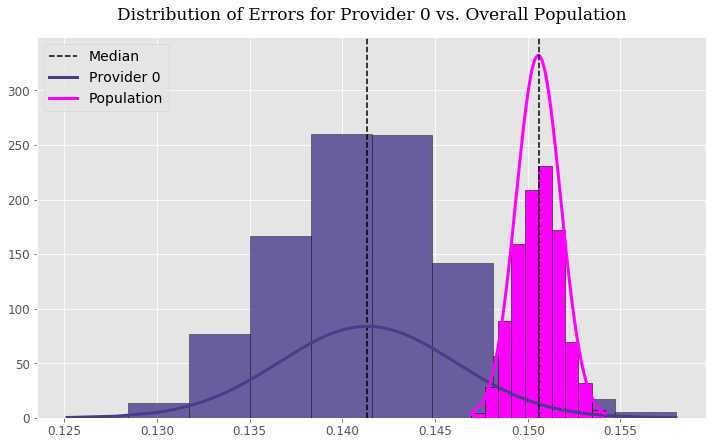

In [35]:
plt.style.use('ggplot')

from scipy.stats import norm

a=np.array(data_vis1['provider0'].sort_values())
fit1 = norm.pdf(a, np.mean(a), np.std(a))
b=np.array(data_vis1['benchmark'].sort_values())
fit2 = norm.pdf(b, np.mean(b), np.std(b))



plt.figure(figsize=(12,7))
plt.axvline(data_vis1['provider0'].median(), color='k', linestyle='dashed', linewidth=1.5)
plt.title("Distribution of Errors for Provider 0 vs. Overall Population",fontsize=17,y=1.03,family="serif")
plt.hist(data_vis1['provider0'],label='Provider0', facecolor='darkslateblue',edgecolor = 'k',alpha=.8)
plt.plot(a,fit1, color='darkslateblue', linewidth=3)



plt.hist(data_vis1['benchmark'], label='Population Benchmark', color='magenta',edgecolor = 'k')
plt.plot(b,fit2, color='magenta',linewidth=3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend([ 'Median','Provider 0', 'Population'],loc='upper left', fontsize=14)


plt.axvline(data_vis1['benchmark'].median(), color='k', linestyle='dashed', linewidth=1.5)

plt.show()

In [2041]:
df_final['code']='Population'
a=df_final[['code','benchmark']]
a.columns=['code','perfomance']


In [2042]:
df_provider0['code']='Provider0'
b=df_provider0[['code','provider0']]
b.columns=['code','perfomance']


In [2043]:
data_vis2=pd.concat([a,b], axis=0)

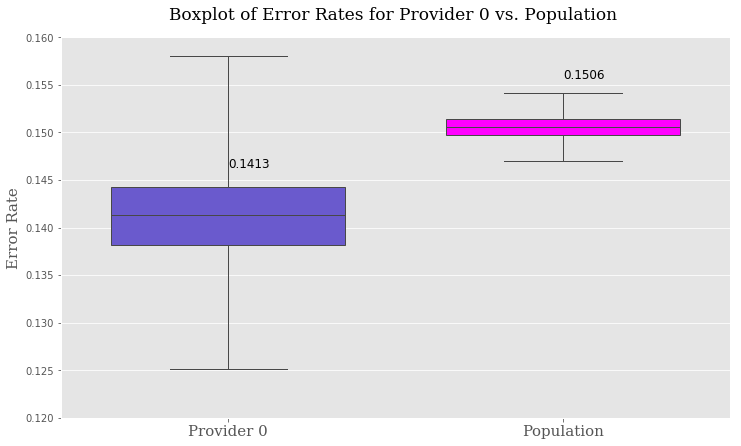

In [2044]:

plt.subplots(figsize=(12, 7))



ax=sns.boxplot (x="code", y = "perfomance", data=data_vis2, saturation=0.5,\
             linewidth=1, width=.7, order=['Provider0','Population'],whis=3)

ax.set_xlabel('')
ax.set_xticklabels(['Provider 0','Population'],size=15,family="serif")

ax.set_ylabel('Error Rate',family="serif",size=15)
ax.set_title("Boxplot of Error Rates for Provider 0 vs. Population ",y=1.03,family="serif", size=17)
ax.set_ylim([0.12,0.16])
mybox0 = ax.artists[0]
mybox0.set_facecolor('slateblue')
mybox1 = ax.artists[1]
mybox1.set_facecolor('magenta')


medians = data_vis2.groupby(['code'])['perfomance'].median().round(10).sort_values()
median_labels = [str(np.round(s, 4)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+.005, median_labels[tick], 
            horizontalalignment='left', size='large')
plt.show()


## PART2

### Estimating a weighted average error rate for Provider 0 for each facility

In [1830]:
data_vis3=pd.concat([df_provider0, df_final['benchmark']], axis=1, join_axes=[ df_final.index])

In [1831]:
df_Facility_0310=data_vis3[['Facility_0310']].copy()
df_Facility_0310['code']='Facility_0310'
df_Facility_0310.columns=['error','code']

In [1832]:
df_Facility_0311=data_vis3[['Facility_0311']].copy()
df_Facility_0311['code']='Facility_0311'
df_Facility_0311.columns=['error','code']

In [1833]:
df_Facility_0308=data_vis3[['Facility_0308']].copy()
df_Facility_0308['code']='Facility_0308'
df_Facility_0308.columns=['error','code']


In [1834]:
df_Facility_0309=data_vis3[['Facility_0309']].copy()
df_Facility_0309['code']='Facility_0309'
df_Facility_0309.columns=['error','code']

In [1835]:
df_benchmark=data_vis3[['benchmark']].copy()
df_benchmark['code']='Population'
df_benchmark.columns=['error','code']


In [1836]:
data_vis4=pd.concat([df_Facility_0310,df_Facility_0311,df_Facility_0308,df_Facility_0309,df_benchmark ], axis=0)

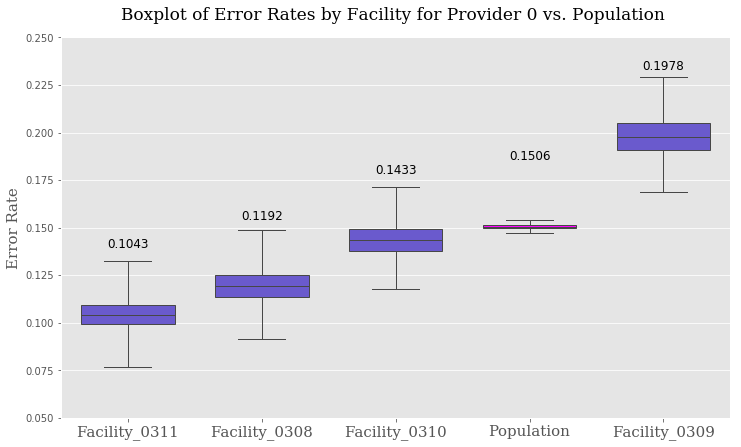

In [1837]:

plt.subplots(figsize=(12, 7))



ax=sns.boxplot(x="code", y = "error", data=data_vis4, saturation=0.5,\
             linewidth=1, width=.7, order=['Facility_0311','Facility_0308','Facility_0310',\
                                           'Population','Facility_0309'],whis=3)

ax.set_xlabel('')
ax.set_xticklabels(['Facility_0311','Facility_0308','Facility_0310',\
                                           'Population','Facility_0309'],size=15,family="serif")

ax.set_ylabel('Error Rate',family="serif",size=15)
ax.set_title("Boxplot of Error Rates by Facility for Provider 0 vs. Population ",y=1.03,family="serif", size=17)
ax.set_ylim([0.05,0.25])

mybox0 = ax.artists[0]
mybox1 = ax.artists[1]
mybox2 = ax.artists[2]
mybox4 = ax.artists[4]
mybox3 = ax.artists[3]
mybox0.set_facecolor('slateblue')
mybox1.set_facecolor('slateblue')
mybox2.set_facecolor('slateblue')
mybox4.set_facecolor('slateblue')
mybox3.set_facecolor('magenta')


medians = data_vis4.groupby(['code'])['error'].median().round(10).sort_values()
median_labels = [str(np.round(s, 4)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+.035, median_labels[tick], 
            horizontalalignment='center', size='large')
plt.show()

### Estimating a weighted average for exam A across all facilities

In [1838]:
df5=df2[['facility_id', 'anatomy_a_exam_volume']].copy()

In [1839]:
df6=df5.set_index('facility_id').transpose()

In [1840]:
df6['rows']=1000

In [1841]:
df7 = df6.loc[df6.index.repeat(df6['rows'])].reset_index()

df7.iloc[:,:-1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 312 entries, index to Facility_0021
dtypes: int64(311), object(1)
memory usage: 2.4+ MB


In [1842]:
df7.reset_index(drop=True, col_level=1)
df8=df7.iloc[:, 1:-1]

In [1843]:
df_facA=pd.concat([data_A['facility_id'],data_A.iloc[:,1:-3]], axis=1)

examA=df_facA.set_index('facility_id').transpose().reset_index(drop=True)

In [1844]:
examA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 311 entries, Facility_0264 to Facility_0021
dtypes: float64(311)
memory usage: 2.4 MB


In [1845]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 311 entries, Facility_0264 to Facility_0021
dtypes: int64(311)
memory usage: 2.4 MB


In [1846]:
dat_examA=pd.DataFrame(examA.values*df8.values, columns=examA.columns, index=examA.index)

In [1847]:
dat_examA['sum_all_facilities']=dat_examA.sum(axis=1)
df8['sum_all_volume']=df8.sum(axis=1)

In [1848]:
dat_examA['exam_A_rate']=dat_examA['sum_all_facilities']/df8['sum_all_volume']

### Estimating a weighted average for exam A across facilities for Provider 0

In [1934]:
provider0=pd.merge( df_A,df2, on=['facility_id'])

In [1935]:
data_provider0=provider0[provider0['parent_id']==0].iloc[:,:-6]
volume_provider0=df2[df2['parent_id']==0]

In [1936]:
df5=volume_provider0[['facility_id', 'anatomy_a_exam_volume']].copy()
df6=df5.set_index('facility_id').transpose()
df6['rows']=1000
df7 = df6.loc[df6.index.repeat(df6['rows'])].reset_index()
df7.iloc[:,:-1].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
index            1000 non-null object
Facility_0310    1000 non-null int64
Facility_0311    1000 non-null int64
Facility_0308    1000 non-null int64
Facility_0309    1000 non-null int64
dtypes: int64(4), object(1)
memory usage: 39.1+ KB


In [1937]:
df7.reset_index(drop=True, col_level=1)
df8=df7.iloc[:, 1:-1]

In [1938]:
df8.columns=['Facility_0310_rate', 'Facility_0311_rate', 'Facility_0308_rate', 'Facility_0309_rate']


In [1939]:
examA_0=data_provider0.set_index('index_A').transpose().reset_index(drop=True)




In [1940]:
dat_examA_0=pd.concat((examA_0,df8), axis=1)

dat_examA_0.head()

,Facility_0310_A,Facility_0311_A,Facility_0308_A,Facility_0309_A,Facility_0310_rate,Facility_0311_rate,Facility_0308_rate,Facility_0309_rate
0,0.269170,0.115919,0.206685,0.167888,511,396,135,512
1,0.286112,0.089648,0.178173,0.150792,511,396,135,512
2,0.286180,0.133311,0.198550,0.123066,511,396,135,512
3,0.238690,0.106451,0.159202,0.141479,511,396,135,512
4,0.258238,0.122614,0.206263,0.133915,511,396,135,512


In [1941]:
dat_examA_0['exam_A_rate_0']=(dat_examA_0['Facility_0310_A']*dat_examA_0['Facility_0310_rate'] +\
dat_examA_0['Facility_0311_A']*dat_examA_0['Facility_0311_rate']+\
dat_examA_0['Facility_0308_A']*dat_examA_0['Facility_0308_rate']+\
dat_examA_0['Facility_0309_A']*dat_examA_0['Facility_0309_rate'])/(dat_examA_0['Facility_0310_rate']+dat_examA_0['Facility_0311_rate']+\
                                                                  dat_examA_0['Facility_0308_rate']+dat_examA_0['Facility_0309_rate'])




### Estimating a weighted average for exam B across all facilities

In [1942]:
df5=df2[['facility_id', 'anatomy_b_exam_volume']].copy()

In [1943]:
df6=df5.set_index('facility_id').transpose()

In [1944]:
df6['rows']=1000

In [1945]:
df7 = df6.loc[df6.index.repeat(df6['rows'])].reset_index()

df7.iloc[:,:-1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 312 entries, index to Facility_0021
dtypes: int64(311), object(1)
memory usage: 2.4+ MB


In [1946]:
df7.reset_index(drop=True, col_level=1)
df8=df7.iloc[:, 1:-1]

In [1947]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 311 entries, Facility_0264 to Facility_0021
dtypes: int64(311)
memory usage: 2.4 MB


In [1948]:
df_facB=pd.concat([data_B['facility_id'],data_B.iloc[:,1:-4]], axis=1)

examB=df_facB.set_index('facility_id').transpose().reset_index(drop=True)

In [1949]:
examB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 311 entries, Facility_0264 to Facility_0021
dtypes: float64(311)
memory usage: 2.4 MB


In [1950]:
dat_examB=pd.DataFrame(examB.values*df8.values, columns=examB.columns, index=examB.index)

In [1951]:
dat_examB['sum_all_facilities']=dat_examB.sum(axis=1)
df8['sum_all_volume']=df8.sum(axis=1)

In [1952]:
dat_examB['exam_B_rate']=dat_examB['sum_all_facilities']/df8['sum_all_volume']

### Estimating a weighted average for exam B across facilities for Provider 0

In [1953]:
provider0=pd.merge( df_B,df2, on=['facility_id'])

In [1954]:
data_provider0=provider0[provider0['parent_id']==0].iloc[:,:-6]
volume_provider0=df2[df2['parent_id']==0]

In [1955]:
df5=volume_provider0[['facility_id', 'anatomy_b_exam_volume']].copy()
df6=df5.set_index('facility_id').transpose()
df6['rows']=1000
df7 = df6.loc[df6.index.repeat(df6['rows'])].reset_index()
df7.iloc[:,:-1].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
index            1000 non-null object
Facility_0310    1000 non-null int64
Facility_0311    1000 non-null int64
Facility_0308    1000 non-null int64
Facility_0309    1000 non-null int64
dtypes: int64(4), object(1)
memory usage: 39.1+ KB


In [1956]:
df7.reset_index(drop=True, col_level=1)
df8=df7.iloc[:, 1:-1]

In [1957]:
df8.columns=['Facility_0310_rate', 'Facility_0311_rate', 'Facility_0308_rate', 'Facility_0309_rate']


In [1958]:
examB_0=data_provider0.set_index('index_B').transpose().reset_index(drop=True)




In [1959]:
dat_examB_0=pd.concat((examB_0,df8), axis=1)

dat_examB_0.head()

,Facility_0310_B,Facility_0311_B,Facility_0308_B,Facility_0309_B,Facility_0310_rate,Facility_0311_rate,Facility_0308_rate,Facility_0309_rate
0,0.103303,0.016193,0.073522,0.110930,418,241,336,392
1,0.118093,0.025283,0.083424,0.123855,418,241,336,392
2,0.094715,0.017055,0.062094,0.120702,418,241,336,392
3,0.118690,0.018186,0.100980,0.120078,418,241,336,392
4,0.099760,0.017794,0.069384,0.126576,418,241,336,392


In [1960]:
dat_examB_0['exam_B_rate_0']=(dat_examB_0['Facility_0310_B']*dat_examB_0['Facility_0310_rate'] +\
dat_examB_0['Facility_0311_B']*dat_examB_0['Facility_0311_rate']+\
dat_examB_0['Facility_0308_B']*dat_examB_0['Facility_0308_rate']+\
dat_examB_0['Facility_0309_B']*dat_examB_0['Facility_0309_rate'])/(dat_examB_0['Facility_0310_rate']+dat_examB_0['Facility_0311_rate']+\
                                                                  dat_examB_0['Facility_0308_rate']+dat_examB_0['Facility_0309_rate'])




### Estimating a weighted average for exam C across all facilities

In [1591]:
df5=df2[['facility_id', 'anatomy_c_exam_volume']].copy()

In [1592]:
df6=df5.set_index('facility_id').transpose()

In [1593]:
df6['rows']=1000

In [1594]:
df7 = df6.loc[df6.index.repeat(df6['rows'])].reset_index()

df7.iloc[:,:-1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 312 entries, index to Facility_0021
dtypes: int64(311), object(1)
memory usage: 2.4+ MB


In [1595]:
df7.reset_index(drop=True, col_level=1)
df8=df7.iloc[:, 1:-1]

In [1596]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 311 entries, Facility_0264 to Facility_0021
dtypes: int64(311)
memory usage: 2.4 MB


In [1599]:
df_facC=pd.concat([data_C['facility_id'],data_C.iloc[:,1:-5]], axis=1)

examC=df_facC.set_index('facility_id').transpose().reset_index(drop=True)

In [1600]:
examC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 311 entries, Facility_0264 to Facility_0021
dtypes: float64(311)
memory usage: 2.4 MB


In [1601]:
dat_examC=pd.DataFrame(examC.values*df8.values, columns=examC.columns, index=examC.index)

In [1602]:
dat_examC['sum_all_facilities']=dat_examC.sum(axis=1)
df8['sum_all_volume']=df8.sum(axis=1)

In [1605]:
dat_examC['exam_C_rate']=dat_examC['sum_all_facilities']/df8['sum_all_volume']


### Estimating a weighted average for exam C across facilities for Provider 0

In [1961]:
provider0=pd.merge( df_C,df2, on=['facility_id'])

In [1962]:
data_provider0=provider0[provider0['parent_id']==0].iloc[:,:-6]
volume_provider0=df2[df2['parent_id']==0]

In [1963]:
df5=volume_provider0[['facility_id', 'anatomy_c_exam_volume']].copy()
df6=df5.set_index('facility_id').transpose()
df6['rows']=1000
df7 = df6.loc[df6.index.repeat(df6['rows'])].reset_index()
df7.iloc[:,:-1].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
index            1000 non-null object
Facility_0310    1000 non-null int64
Facility_0311    1000 non-null int64
Facility_0308    1000 non-null int64
Facility_0309    1000 non-null int64
dtypes: int64(4), object(1)
memory usage: 39.1+ KB


In [1964]:
df7.reset_index(drop=True, col_level=1)
df8=df7.iloc[:, 1:-1]

In [1973]:
df8.columns=['Facility_0310_rate', 'Facility_0311_rate', 'Facility_0308_rate', 'Facility_0309_rate']


In [1974]:
examC_0=data_provider0.set_index('index_C').transpose().reset_index(drop=True)




In [1975]:
dat_examC_0=pd.concat((examC_0,df8), axis=1)

dat_examC_0.head()

,Facility_0310_C,Facility_0311_C,Facility_0308_C,Facility_0309_C,Facility_0310_rate,Facility_0311_rate,Facility_0308_rate,Facility_0309_rate
0,0.016153,0.118883,0.135302,0.296618,381,402,489,349
1,0.006780,0.132875,0.125050,0.316465,381,402,489,349
2,0.003155,0.134000,0.112644,0.353822,381,402,489,349
3,0.017346,0.129644,0.113665,0.360230,381,402,489,349
4,0.006488,0.130007,0.132690,0.342632,381,402,489,349


In [1977]:
dat_examC_0['exam_C_rate_0']=(dat_examC_0['Facility_0310_C']*dat_examC_0['Facility_0310_rate'] +\
dat_examC_0['Facility_0311_C']*dat_examC_0['Facility_0311_rate']+\
dat_examC_0['Facility_0308_C']*dat_examC_0['Facility_0308_rate']+\
dat_examC_0['Facility_0309_C']*dat_examC_0['Facility_0309_rate'])/(dat_examC_0['Facility_0310_rate']+dat_examC_0['Facility_0311_rate']+\
                                                                  dat_examC_0['Facility_0308_rate']+dat_examC_0['Facility_0309_rate'])




In [1978]:
exam_A_rate=dat_examA[['exam_A_rate']].copy()
exam_A_rate['code']='RateExamA'
exam_A_rate.columns=['error','code']

exam_A_rate_0=dat_examA_0[['exam_A_rate_0']].copy()
exam_A_rate_0['code']='RateExamA_0'
exam_A_rate_0.columns=['error','code']

In [1979]:
exam_B_rate=dat_examB[['exam_B_rate']].copy()
exam_B_rate['code']='RateExamB'
exam_B_rate.columns=['error','code']

exam_B_rate_0=dat_examB_0[['exam_B_rate_0']].copy()
exam_B_rate_0['code']='RateExamB_0'
exam_B_rate_0.columns=['error','code']

In [1980]:
exam_C_rate=dat_examC[['exam_C_rate']].copy()
exam_C_rate['code']='RateExamC'
exam_C_rate.columns=['error','code']

exam_C_rate_0=dat_examC_0[['exam_C_rate_0']].copy()
exam_C_rate_0['code']='RateExamC_0'
exam_C_rate_0.columns=['error','code']


In [1987]:
data_vis5=pd.concat([exam_A_rate,exam_A_rate_0, exam_B_rate_0,exam_B_rate,exam_C_rate_0,exam_C_rate], axis=0)

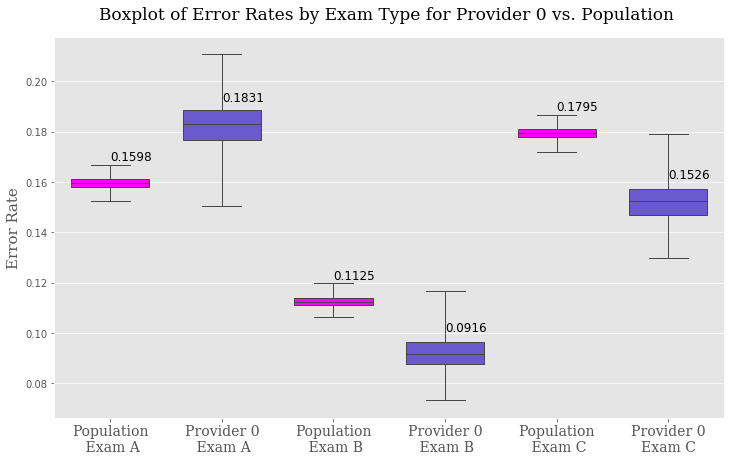

In [2074]:

plt.subplots(figsize=(12, 7))



ax=sns.boxplot(x="code", y = "error", data=data_vis5, saturation=0.5,\
             linewidth=1, width=.7, order=['RateExamA','RateExamA_0',\
                                           'RateExamB','RateExamB_0',\
                                           'RateExamC','RateExamC_0'],whis=3)

ax.set_xlabel('')
ax.set_xticklabels(['Population\n Exam A','Provider 0\n Exam A',\
                     'Population\n Exam B','Provider 0\n Exam B',\
'Population\n Exam C','Provider 0\nExam C'],size=14,family="serif")

ax.set_ylabel('Error Rate',family="serif",size=15)
ax.set_title("Boxplot of Error Rates by Exam Type for Provider 0 vs. Population ",y=1.03,family="serif", size=17)
# ax.set_ylim([0.05,0.25])

mybox0 = ax.artists[0]
mybox1 = ax.artists[1]
mybox2 = ax.artists[2]
mybox4 = ax.artists[4]
mybox3 = ax.artists[3]
mybox5 = ax.artists[5]
mybox0.set_facecolor('magenta')
mybox1.set_facecolor('slateblue')
mybox2.set_facecolor('magenta')
mybox3.set_facecolor('slateblue')
mybox4.set_facecolor('magenta')
mybox5.set_facecolor('slateblue')


medians = data_vis5.groupby(['code'])['error'].median().round(10)
median_labels = [str(np.round(s, 4)) for s in medians]

pos = range(len(medians))
for tick, label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick]+.009, median_labels[tick], 
            horizontalalignment='left', size='large')
plt.show()